# multi-wayExamples - Chemometrics example

## We will consider another problem using Data already in tensor form.


The data set is from http://www.models.life.ku.dk/nwaydata in Matlab form, and can be read by scipy loadmat function, and saved as numpy arrays for easier loads later

The data has X variable as 3-way tensor of 5 samples in mode - 1 (rows) 5 × 51 × 201. , containing different amounts of tyrosine, tryptophan and phenylalanine amino acids belong to three amino acids dissolved in phosphate buffered water. The samples were measured by fluorescence (excitation 250-300 nm, emission 250-450 nm, 1 nm intervals) on a spectrofluorometer

The data has Y variable, which is the ground truth, the known concentrations of the three chemicals (mode-2) that are in the samples (mode-1)

In [1]:
import scipy.io
amino = scipy.io.loadmat('data/amino.mat')
X = amino.get('X')
Y = amino.get('Y')
import numpy as np

np.save('data/amino_x', X)
np.save('data/amino_y', Y)
X.shape

(5, 201, 61)

In [2]:
Y.shape

(5, 3)

In [3]:
# doing Parafac decomposition
from tensorly.decomposition import parafac
weights, factors = parafac(X,rank = 3, verbose = 2)

Starting iteration 1
Mode 0 of 3
Mode 1 of 3
Mode 2 of 3
reconstruction error=0.4124100546927462
Starting iteration 2
Mode 0 of 3
Mode 1 of 3
Mode 2 of 3
iteration 1, reconstruction error: 0.11517886685667383, decrease = 0.2972311878360724, unnormalized = 5527.65843445604
Starting iteration 3
Mode 0 of 3
Mode 1 of 3
Mode 2 of 3
iteration 2, reconstruction error: 0.09497527359330413, decrease = 0.020203593263369707, unnormalized = 4558.048594071386
Starting iteration 4
Mode 0 of 3
Mode 1 of 3
Mode 2 of 3
iteration 3, reconstruction error: 0.08869989968799596, decrease = 0.0062753739053081625, unnormalized = 4256.881162547623
Starting iteration 5
Mode 0 of 3
Mode 1 of 3
Mode 2 of 3
iteration 4, reconstruction error: 0.08457798021897432, decrease = 0.004121919469021643, unnormalized = 4059.062208941848
Starting iteration 6
Mode 0 of 3
Mode 1 of 3
Mode 2 of 3
iteration 5, reconstruction error: 0.08088627097394507, decrease = 0.0036917092450292482, unnormalized = 3881.8898829522313
Starting

iteration 69, reconstruction error: 0.02505695494570537, decrease = 1.3852772418124215e-06, unnormalized = 1202.5321322162997
Starting iteration 71
Mode 0 of 3
Mode 1 of 3
Mode 2 of 3
iteration 70, reconstruction error: 0.025055765314001624, decrease = 1.1896317037470017e-06, unnormalized = 1202.4750394708979
Starting iteration 72
Mode 0 of 3
Mode 1 of 3
Mode 2 of 3
iteration 71, reconstruction error: 0.025054743644451247, decrease = 1.0216695503773021e-06, unnormalized = 1202.4260075567847
Starting iteration 73
Mode 0 of 3
Mode 1 of 3
Mode 2 of 3
iteration 72, reconstruction error: 0.02505386617999848, decrease = 8.774644527677344e-07, unnormalized = 1202.3838963265248
Starting iteration 74
Mode 0 of 3
Mode 1 of 3
Mode 2 of 3
iteration 73, reconstruction error: 0.02505311253146968, decrease = 7.536485287992778e-07, unnormalized = 1202.3477272639136
Starting iteration 75
Mode 0 of 3
Mode 1 of 3
Mode 2 of 3
iteration 74, reconstruction error: 0.02505246519875723, decrease = 6.4733271245

## PARAFAC should have three components and therefore a 5 × 3 so called score matrix (first mode loading matrix). Each column in this score matrix should approximately match the concentration of one of the three aminoacids which are held in the 5 × 3 Y matrix. Matching in this case, means that the corresponding columns should be correlated.

In [4]:
len(factors)

3

In [5]:
[f.shape for f in factors]

[(5, 3), (201, 3), (61, 3)]

In [6]:
np.isclose(Y, factors[0]) # obviously they are not close enough for numpy, will do all possible column permutations correlation then

array([[False, False, False],
       [False, False, False],
       [False, False, False],
       [False, False, False],
       [False, False, False]])

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def corrEstimate (i, j, Y, factors):
    data = {
        'Y': Y[:,i], 
        'Y_p': factors[0][:,j]
    }

    df = pd.DataFrame(data, columns=['Y', 'Y_p'])
    corr = df.corr()
    print("Correlation matrix of estimated column" + str(i) + " with ground truth " + str(j) + " is : ")
    print(corr)
    
    return corr, ax

Correlation matrix of estimated column0 with ground truth 0 is : 
           Y      Y_p
Y    1.00000 -0.99979
Y_p -0.99979  1.00000
Correlation matrix of estimated column0 with ground truth 1 is : 
            Y       Y_p
Y    1.000000 -0.453046
Y_p -0.453046  1.000000
Correlation matrix of estimated column0 with ground truth 2 is : 
            Y       Y_p
Y    1.000000 -0.472091
Y_p -0.472091  1.000000
Correlation matrix of estimated column1 with ground truth 0 is : 
            Y       Y_p
Y    1.000000  0.468775
Y_p  0.468775  1.000000
Correlation matrix of estimated column1 with ground truth 1 is : 
            Y       Y_p
Y    1.000000 -0.485107
Y_p -0.485107  1.000000
Correlation matrix of estimated column1 with ground truth 2 is : 
            Y       Y_p
Y    1.000000  0.999839
Y_p  0.999839  1.000000
Correlation matrix of estimated column2 with ground truth 0 is : 
            Y       Y_p
Y    1.000000  0.455363
Y_p  0.455363  1.000000
Correlation matrix of estimated column2 

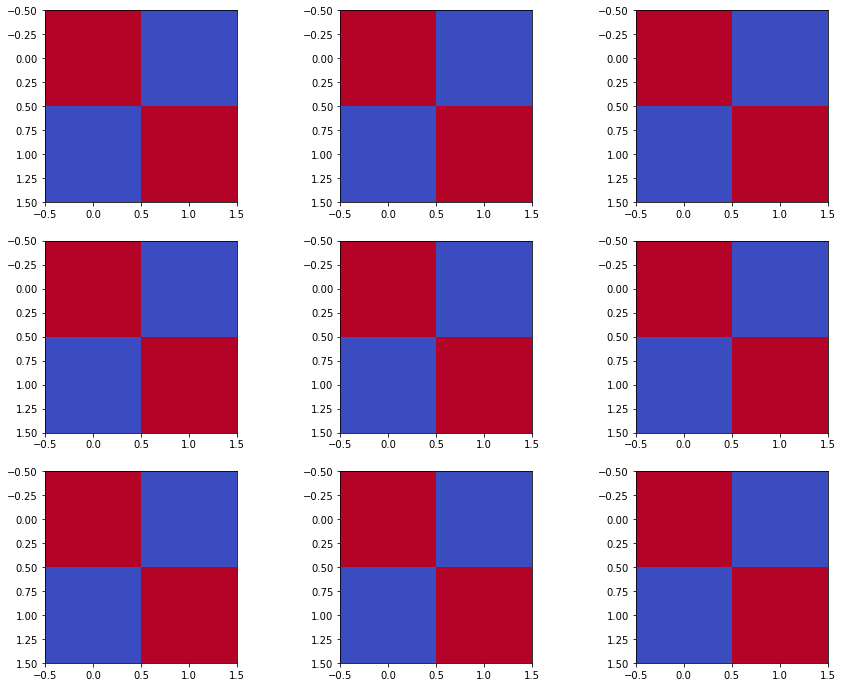

In [11]:
plt.figure(figsize=(15, 12))
ax = 0
corrList = []
for i in range(Y.shape[1]):
    for j in range(factors[0].shape[1]):
        corr, ax = corrEstimate(i, j, Y, factors)
        corrList.append(corr)

n=0 # there is a bug that makes the plot read the same correlation matrix every time, I tried inside the function, and then added the list to separate the variables, and not good
for i in range(Y.shape[1]):
    for j in range(factors[0].shape[1]):
        ax = plt.subplot(3, 3, n+1)
        plt.imshow(corrList[n],cmap='coolwarm',interpolation='nearest')
        n= n+1
plt.show()

### It is obvious that the first estimated chemical matches the first ground truth, more than the other two

### The second estimated chemical matches the third ground truth, 

### The third estimated checmical matches the second ground truth

### The second and third are swapped